# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json
from datetime import datetime 
import seaborn as sns

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [83]:
print(json.dumps(city_weather, indent = 4, sort_keys = True))

{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 37.7077,
        "lon": 12.4999
    },
    "dt": 1737340746,
    "id": 2523816,
    "main": {
        "feels_like": 14.55,
        "grnd_level": 1017,
        "humidity": 78,
        "pressure": 1020,
        "sea_level": 1020,
        "temp": 14.96,
        "temp_max": 14.96,
        "temp_min": 14.96
    },
    "name": "Petrosino",
    "rain": {
        "1h": 0.32
    },
    "sys": {
        "country": "IT",
        "id": 2096361,
        "sunrise": 1737354114,
        "sunset": 1737389988,
        "type": 2
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 160,
        "gust": 6.26,
        "speed": 4.26
    }
}


In [34]:


url= "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zahedan
Processing Record 2 of Set 1 | jiaojiang
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | wewak
Processing Record 5 of Set 1 | thurso
Processing Record 6 of Set 1 | airuk
Processing Record 7 of Set 1 | miquelon
Processing Record 8 of Set 1 | rincon
Processing Record 9 of Set 1 | port hedland
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | karratha
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | lihue
Processing Record 15 of Set 1 | okha
Processing Record 16 of Set 1 | kupang
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | lerwick
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | bubaque
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | grand gaube
Processing Record 23 of Set 1 | waitangi
Proc

In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [36]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zahedan,29.4963,60.8629,2.95,100,2,4.12,IR,1737340070
1,jiaojiang,28.6803,121.4428,13.38,36,100,0.24,CN,1737340071
2,puerto ayora,-0.7393,-90.3518,24.75,94,36,3.13,EC,1737340072
3,wewak,-3.5534,143.6268,29.01,74,17,2.05,PG,1737339984
4,thurso,58.5927,-3.5259,0.14,83,33,3.01,GB,1737340074


In [37]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [38]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zahedan,29.4963,60.8629,2.95,100,2,4.12,IR,1737340070
1,jiaojiang,28.6803,121.4428,13.38,36,100,0.24,CN,1737340071
2,puerto ayora,-0.7393,-90.3518,24.75,94,36,3.13,EC,1737340072
3,wewak,-3.5534,143.6268,29.01,74,17,2.05,PG,1737339984
4,thurso,58.5927,-3.5259,0.14,83,33,3.01,GB,1737340074


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

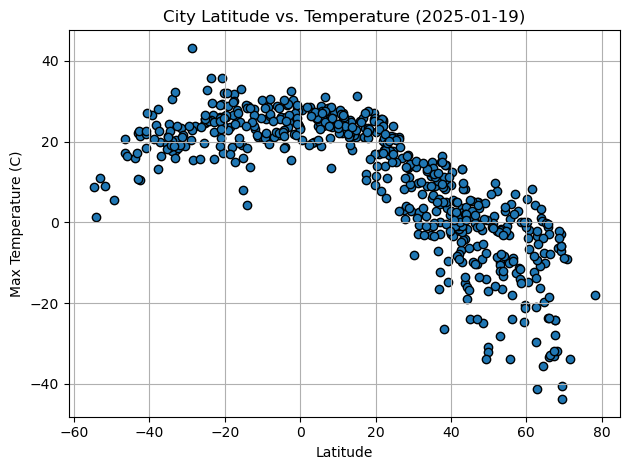

In [57]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors = "k")

# Incorporate the other graph properties
date = datetime.today()
date = date.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

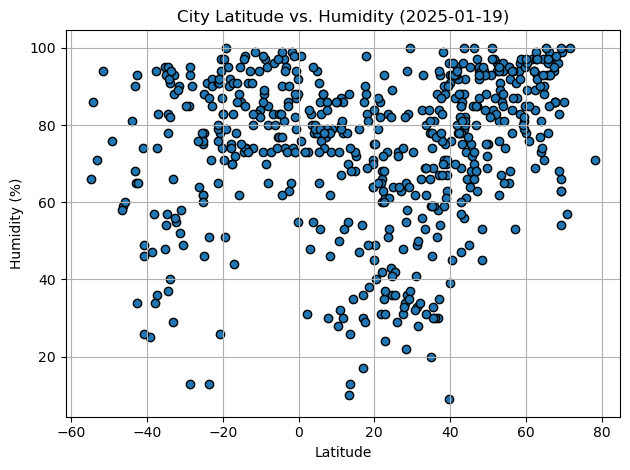

In [58]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors = 'k')

# Incorporate the other graph properties
date = datetime.today()
date = date.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

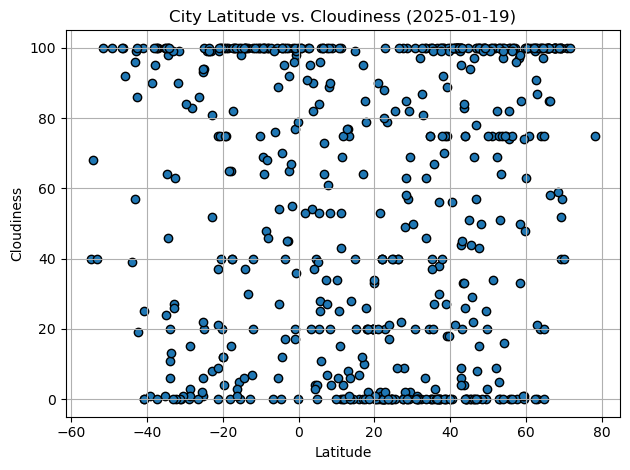

In [59]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors = 'k')

# Incorporate the other graph properties
date = datetime.today()
date = date.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

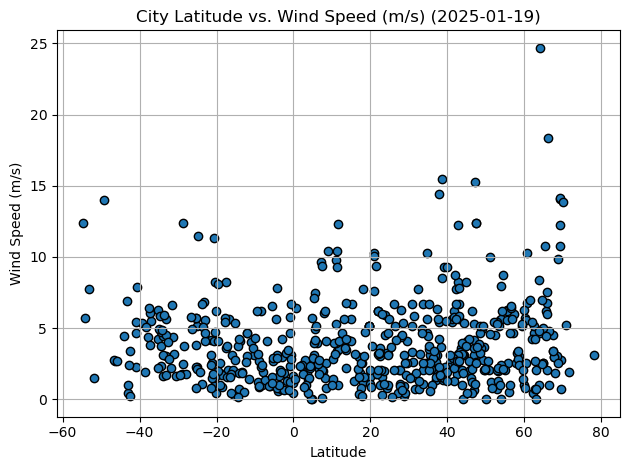

In [60]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors = 'k')

# Incorporate the other graph properties
date = datetime.today()
date = date.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Wind Speed (m/s) ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [78]:
# Define a function to create Linear Regression plots
#from sklearn.linear_model import LinearRegression
#lm = LinearRegression()
#___________________________________________________

#for computing
#slope = linregress(x_values, y_values)
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#regress_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zahedan,29.4963,60.8629,2.95,100,2,4.12,IR,1737340070
1,jiaojiang,28.6803,121.4428,13.38,36,100,0.24,CN,1737340071
4,thurso,58.5927,-3.5259,0.14,83,33,3.01,GB,1737340074
5,airuk,7.2772,168.8203,27.56,77,34,9.65,MH,1737340075
6,miquelon,47.0975,-56.3814,5.10,97,100,15.27,PM,1737340076


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto ayora,-0.7393,-90.3518,24.75,94,36,3.13,EC,1737340072
3,wewak,-3.5534,143.6268,29.01,74,17,2.05,PG,1737339984
8,port hedland,-20.3167,118.5667,32.03,74,20,8.23,AU,1737339989
9,margaret river,-33.9500,115.0667,30.59,40,6,1.65,AU,1737340079
10,ushuaia,-54.8000,-68.3000,8.81,66,40,12.35,AR,1737339991


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is 0.7


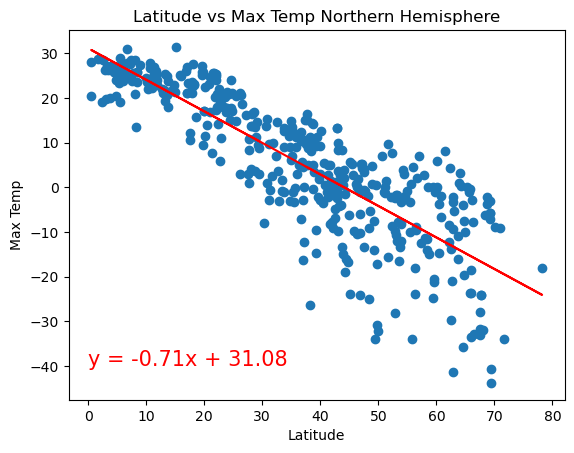

In [96]:
# Linear regression on Northern Hemisphere
#sns.lmplot(x= "Lat",
           #y = "Max Temp",
           #data= northern_hemi_df)
#ax = plt.gca()
#ax.set_title("Latitude vs Max Temp")
#___________________________________________________

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(regress_line,(0,-40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp Northern Hemisphere")


print(f"The r-squared value is {round(rvalue**2,2)}")
#print(regress_line)

The r-squared value is 0.17


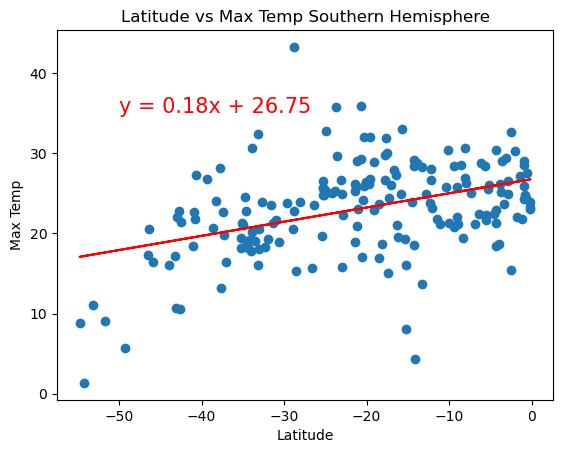

In [99]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(regress_line,(-50,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp Southern Hemisphere")

print(f"The r-squared value is {round(rvalue**2,2)}")

**Discussion about the linear relationship:** Within the Northern Hemisphere Plot for Maximum Temp, there is a strong negative correlation, as the distance from the equator increases, max temperature decreases. The Southern Hemisphere Plot for Max Temp shows a positive relationship, indicating that the closer to the equator the higher the max temperature, although the correlation is not as strong as it is in the Northern Hemisphere plot with an r-square value of 0.7.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is 0.14


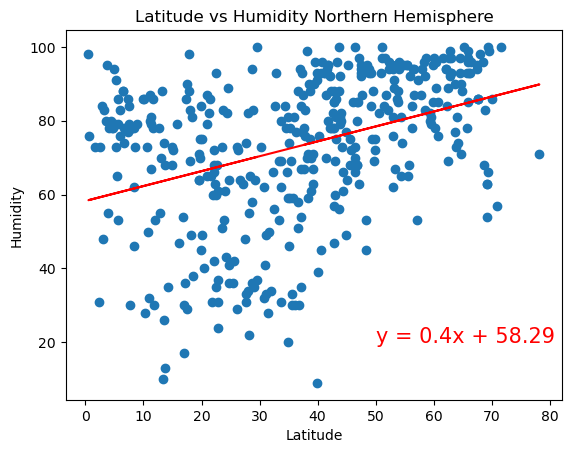

In [101]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(regress_line,(50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity Northern Hemisphere")

print(f"The r-squared value is {round(rvalue**2,2)}")
#print(regress_line)

The r-squared value is 0.12


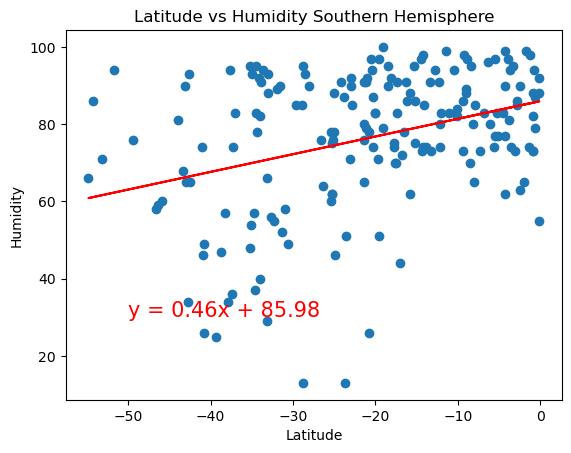

In [102]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(regress_line,(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity Southern Hemisphere")

print(f"The r-squared value is {round(rvalue**2,2)}")
#print(regress_line)

**Discussion about the linear relationship:** The Northern and Southern Hemisphere both have weak positive correlations with the latitude and level of humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is 0.09


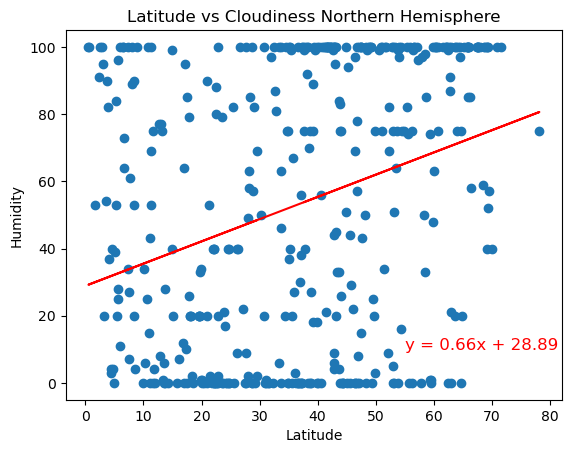

In [107]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(regress_line,(55,10),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Cloudiness Northern Hemisphere")

print(f"The r-squared value is {round(rvalue**2,2)}")
#print(regress_line)

The r-squared value is 0.01


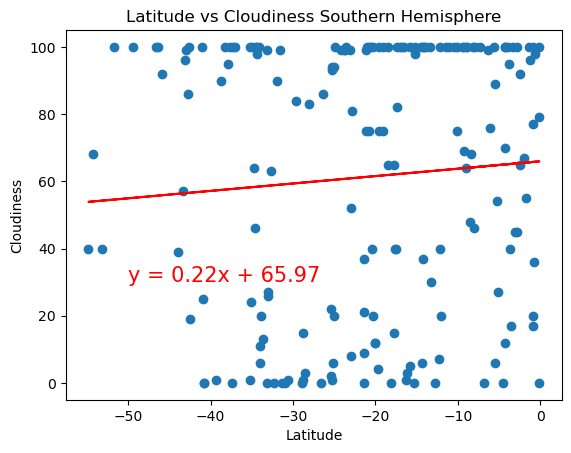

In [106]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(regress_line,(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness Southern Hemisphere")

print(f"The r-squared value is {round(rvalue**2,2)}")
#print(regress_line)

**Discussion about the linear relationship:** The Northern and Southern Hemisphere plots have extremely weak positive coorelations that is negligible.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is 0.02


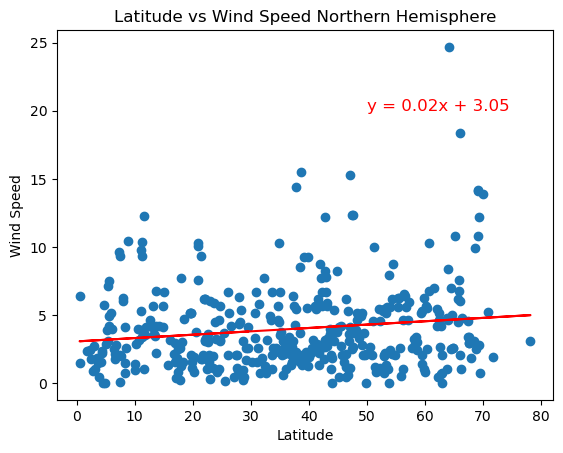

In [109]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(regress_line,(50,20),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed Northern Hemisphere")

print(f"The r-squared value is {round(rvalue**2,2)}")
#print(regress_line)

The r-squared value is 0.1


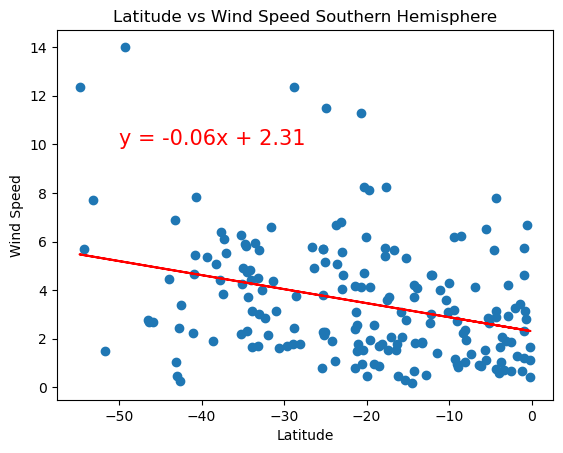

In [111]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(regress_line,(-50,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed Southern Hemisphere")

print(f"The r-squared value is {round(rvalue**2,2)}")
#print(regress_line)

**Discussion about the linear relationship:** The Northern Hemisphere plot indicates a weak positive correlation between latitude and wind speed. The Southern plot indicates a weak negative correlation between latitude and wind speed.